In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('SQL - Retail Sales Analysis_utf .csv')

In [3]:
data.head()

,transactions_id,sale_date,sale_time,customer_id,gender,age,category,quantiy,price_per_unit,cogs,total_sale
0,180,2022-11-05,10:47:00,117,Male,41.0,Clothing,3.0,300.0,129.0,900.0
1,522,2022-07-09,11:00:00,52,Male,46.0,Beauty,3.0,500.0,145.0,1500.0
2,559,2022-12-12,10:48:00,5,Female,40.0,Clothing,4.0,300.0,84.0,1200.0
3,1180,2022-01-06,08:53:00,85,Male,41.0,Clothing,3.0,300.0,129.0,900.0
4,1522,2022-11-14,08:35:00,48,Male,46.0,Beauty,3.0,500.0,235.0,1500.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   transactions_id  2000 non-null   int64  
 1   sale_date        2000 non-null   object 
 2   sale_time        2000 non-null   object 
 3   customer_id      2000 non-null   int64  
 4   gender           2000 non-null   object 
 5   age              1990 non-null   float64
 6   category         2000 non-null   object 
 7   quantiy          1997 non-null   float64
 8   price_per_unit   1997 non-null   float64
 9   cogs             1997 non-null   float64
 10  total_sale       1997 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 172.0+ KB


In [5]:
data.describe()

,transactions_id,customer_id,age,quantiy,price_per_unit,cogs,total_sale
count,2000.000000,2000.000000,1990.000000,1997.000000,1997.000000,1997.000000,1997.000000
mean,1000.500000,66.341500,41.343216,2.512769,180.117677,95.023886,456.544817
std,577.494589,44.937185,13.668167,1.132708,189.685225,121.898695,560.101381
min,1.000000,1.000000,18.000000,1.000000,25.000000,6.250000,25.000000
25%,500.750000,24.000000,29.000000,1.000000,30.000000,13.000000,60.000000
50%,1000.500000,69.000000,42.000000,3.000000,50.000000,27.500000,150.000000
75%,1500.250000,102.000000,53.000000,4.000000,300.000000,147.000000,900.000000
max,2000.000000,155.000000,64.000000,4.000000,500.000000,620.000000,2000.000000


In [6]:
data.shape

(2000, 11)

In [7]:
data.dtypes

transactions_id      int64
sale_date           object
sale_time           object
customer_id          int64
gender              object
age                float64
category            object
quantiy            float64
price_per_unit     float64
cogs               float64
total_sale         float64
dtype: object

In [8]:
data.isnull().sum()

transactions_id     0
sale_date           0
sale_time           0
customer_id         0
gender              0
age                10
category            0
quantiy             3
price_per_unit      3
cogs                3
total_sale          3
dtype: int64

In [9]:
data.dropna(inplace=True)

In [10]:
len(data[data.duplicated()])

0

In [11]:
data['sale_date']=pd.to_datetime(data['sale_date'])

In [12]:
data['age']=data['age'].astype(int)

In [13]:
data['year']=pd.DatetimeIndex(data['sale_date']).year

In [14]:
data['month']=pd.DatetimeIndex(data['sale_date']).month

In [15]:
data['profit']=data['total_sale']-data['cogs']

In [16]:
data['day_of_week'] = data['sale_date'].dt.day_name()


In [17]:
def assign_age_group(age):
    if age < 20:
        return 'Teen'
    elif 20 <= age < 40:
        return 'Adult'
    else:
        return 'Old'
        
data['age_group'] = data['age'].apply(assign_age_group)        

# gender distribution 

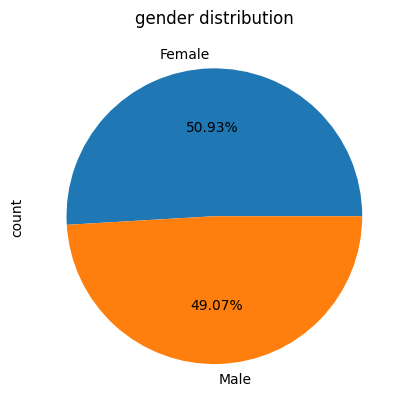

In [18]:
data['gender'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title('gender distribution')
plt.show()

# Gender & Age Distribution

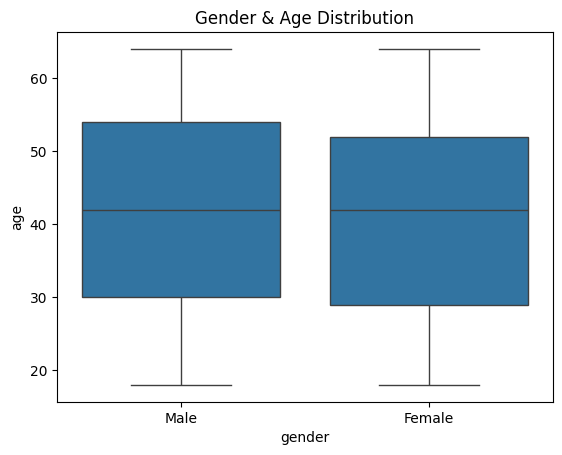

In [19]:
sns.boxplot(x='gender',y='age',data=data)
plt.title('Gender & Age Distribution')
plt.show()

# Total Sales By categories

In [20]:
Total_Sales_By_categories=data.groupby('category')['total_sale'].sum().sort_values(ascending=True).reset_index()

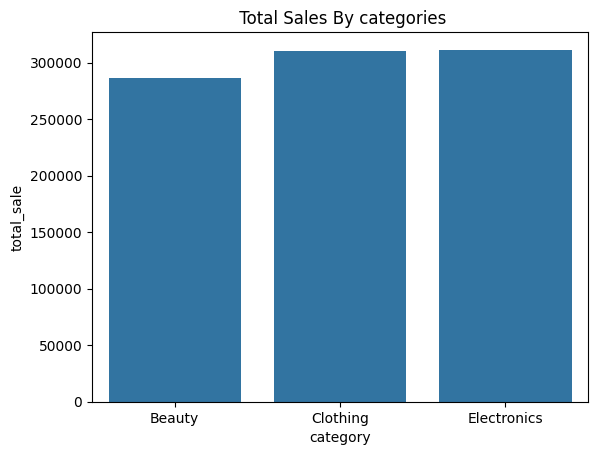

In [21]:
sns.barplot(x='category',y='total_sale',data=Total_Sales_By_categories)
plt.title(' Total Sales By categories')
plt.show()

# profit By day_of_week

In [22]:
profit_By_day_of_week=data.groupby('day_of_week')['profit'].sum().sort_values(ascending=True).reset_index()

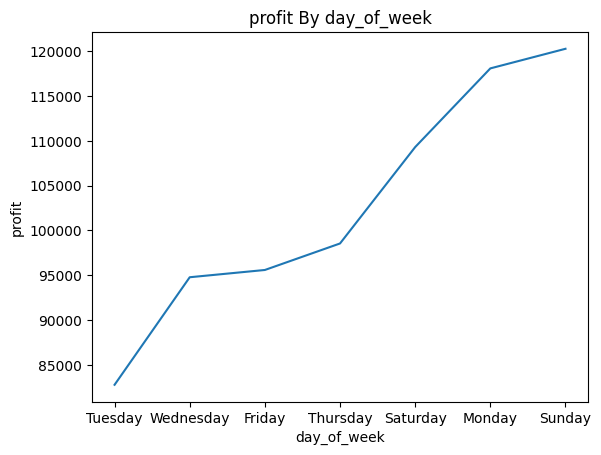

In [23]:
sns.lineplot(x='day_of_week',y='profit',data=profit_By_day_of_week)
plt.title('profit By day_of_week')
plt.show()

# profit By month

In [24]:
profit_By_month=data.groupby('month')['profit'].sum().sort_values(ascending=True).reset_index()

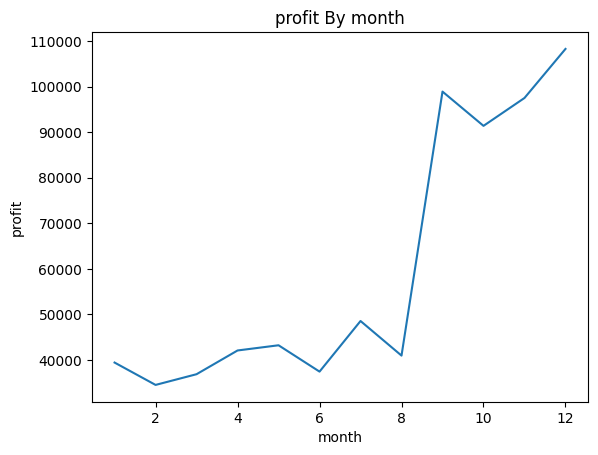

In [25]:
sns.lineplot(x='month',y='profit',data=profit_By_month)
plt.title('profit By month')
plt.show()

# Sales by Category 

In [26]:
sales_pivot=data.pivot_table(index='category',values='total_sale',aggfunc=['sum', 'mean', 'count'])

In [27]:
sales_pivot.columns = ['Total Sales', 'Average Sales', 'Sales Count']

In [28]:
sales_pivot

,Total Sales,Average Sales,Sales Count
category,,,
Beauty,286790.0,469.378069,611
Clothing,309995.0,444.118911,698
Electronics,311445.0,459.358407,678


# profit by Category 

In [29]:
profit_by_gender=data.groupby('gender')['profit'].sum().reset_index()

In [30]:
profit_by_gender

,gender,profit
0,Female,360221.75
1,Male,359080.45


# profit_by_age_group

In [31]:
profit_by_age_group=data.groupby('age_group')['profit'].sum().reset_index()

In [32]:
profit_by_age_group

,age_group,profit
0,Adult,307176.7
1,Old,370297.6
2,Teen,41827.9


# Customers Spending  more that average

In [33]:
average_sales=data['total_sale'].mean()

In [34]:
average_sales_by_customer=data.groupby('customer_id')['total_sale'].mean()>average_sales

In [35]:
average_sales_by_customer.index

Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
       ...
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155],
      dtype='int64', name='customer_id', length=155)

# Customer Lifetime Value

In [36]:
data.groupby('customer_id')[['total_sale','quantiy']].sum()

,total_sale,quantiy
customer_id,,
1,30750.0,186.0
2,25295.0,154.0
3,38440.0,201.0
4,23580.0,164.0
5,30405.0,159.0
...,...,...
151,2950.0,19.0
152,1830.0,12.0
153,2225.0,9.0
